In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imports-exports-v23/Imports_Exports_Dataset new.csv


In [2]:
df = pd.read_csv('/kaggle/input/imports-exports-v23/Imports_Exports_Dataset new.csv')

In [3]:
df.head()

,Transaction_ID,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Customs_Code,Weight
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,Air,Robertbury,Machinery,1979,9506.57,07-12-2023,620537,4248.65
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,Air,Shahport,Clothing,5763,7100.91,04-04-2023,927600,4340.81
2,f7c1bd87-4da5-4709-9471-3d60c8a70639,Christmas Island,agency,Export,Air,Adamfort,Furniture,2592,7226.42,09-05-2022,996084,4886.14
3,e443df78-9558-467f-9ba9-1faf7a024204,Finland,policy,Export,Air,Juliebury,Electronics,2622,2817.29,03-04-2023,555981,4406.74
4,23a7711a-8133-4876-b7eb-dcd9e87a1613,New Zealand,positive,Export,Sea,East Randall,Machinery,6975,657.80,23-07-2021,741778,1497.16


In [4]:
df.drop(columns=['Transaction_ID','Customs_Code'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          15000 non-null  object 
 1   Product          15000 non-null  object 
 2   Import_Export    15000 non-null  object 
 3   Shipping_Method  15000 non-null  object 
 4   Port             15000 non-null  object 
 5   Category         15000 non-null  object 
 6   Quantity         15000 non-null  int64  
 7   Value            15000 non-null  float64
 8   Date             15000 non-null  object 
 9   Weight           15000 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [6]:
df.head(3)

,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Weight
0,Colombia,describe,Export,Air,Robertbury,Machinery,1979,9506.57,07-12-2023,4248.65
1,Chile,president,Export,Air,Shahport,Clothing,5763,7100.91,04-04-2023,4340.81
2,Christmas Island,agency,Export,Air,Adamfort,Furniture,2592,7226.42,09-05-2022,4886.14


In [9]:
#formatting date column
df.Date = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [10]:
df.shape

(15000, 10)

In [11]:
df.isnull().sum()

Country            0
Product            0
Import_Export      0
Shipping_Method    0
Port               0
Category           0
Quantity           0
Value              0
Date               0
Weight             0
dtype: int64

In [12]:
df.describe()

,Quantity,Value,Date,Weight
count,15000.000000,15000.000000,15000,15000.000000
mean,4980.554733,5032.931120,2022-03-02 20:42:48.960000,2492.118859
min,1.000000,102.120000,2019-09-07 00:00:00,0.570000
25%,2517.000000,2552.750000,2020-12-06 00:00:00,1243.482500
50%,4958.500000,5045.705000,2022-03-02 00:00:00,2476.135000
75%,7458.250000,7504.700000,2023-05-27 00:00:00,3747.392500
max,10000.000000,9999.130000,2024-09-06 00:00:00,4999.930000
std,2866.166690,2857.593897,NaN,1451.378507


In [20]:
df_cat = ['Import_Export','Shipping_Method','Category']
df_num = ['Quantity','Value','Weight']

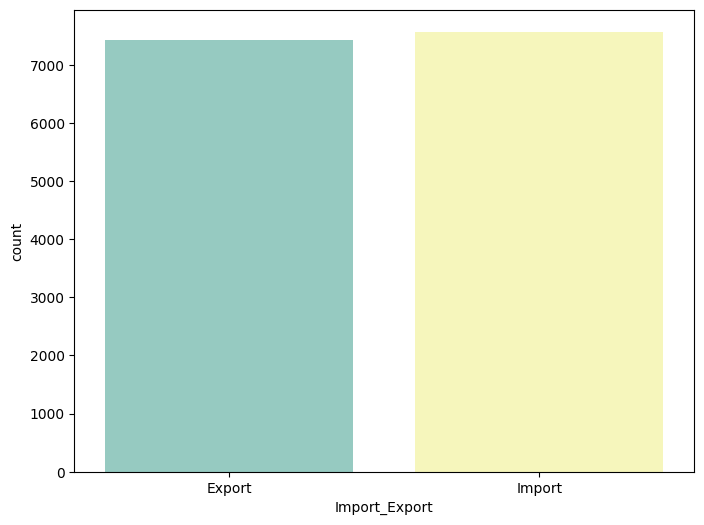

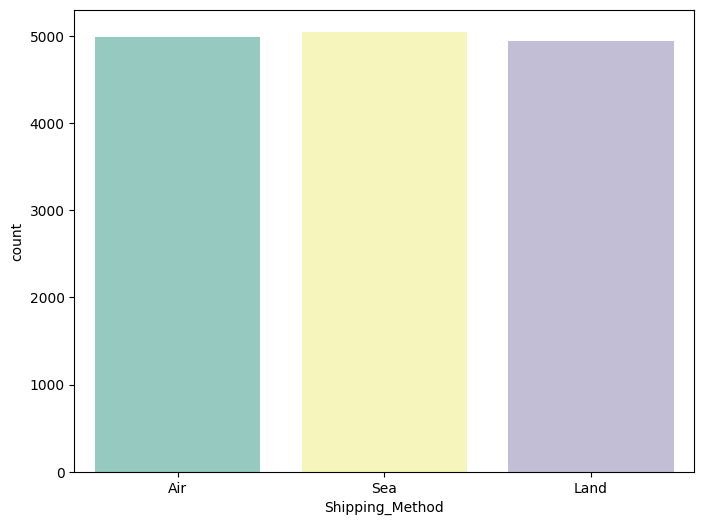

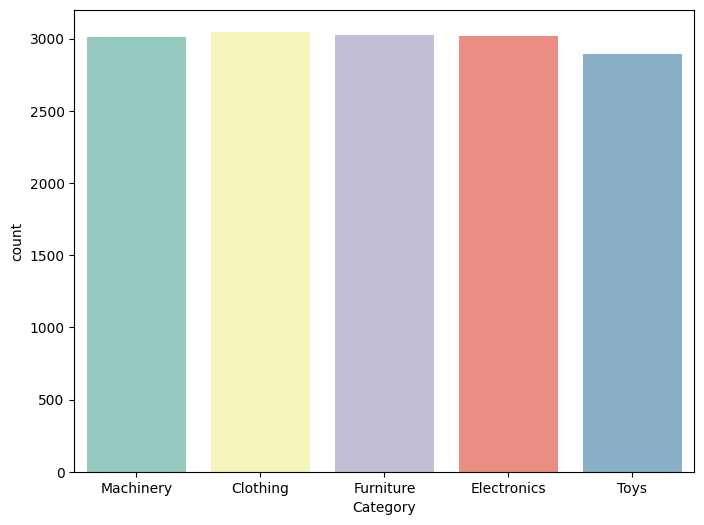

In [23]:
for col in df_cat:
    plt.figure(figsize=(8,6))
    sns.countplot(x = col, data = df,palette = 'Set3')
    plt.show()

- Import

- Sea(Medium of transport)

- Clothing(category)

are the 3 topping each sesctions

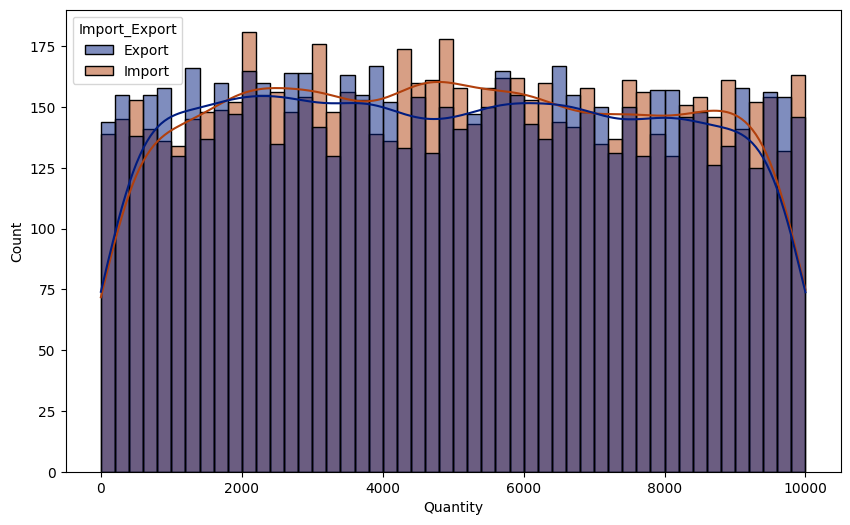

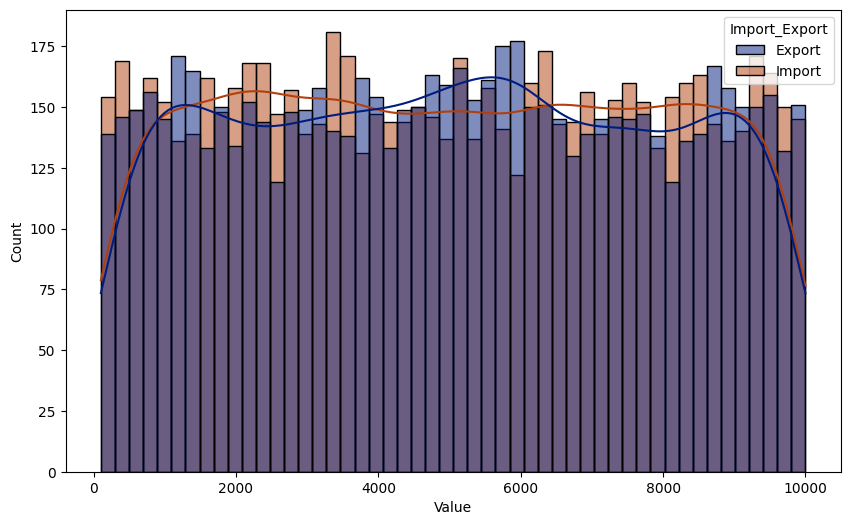

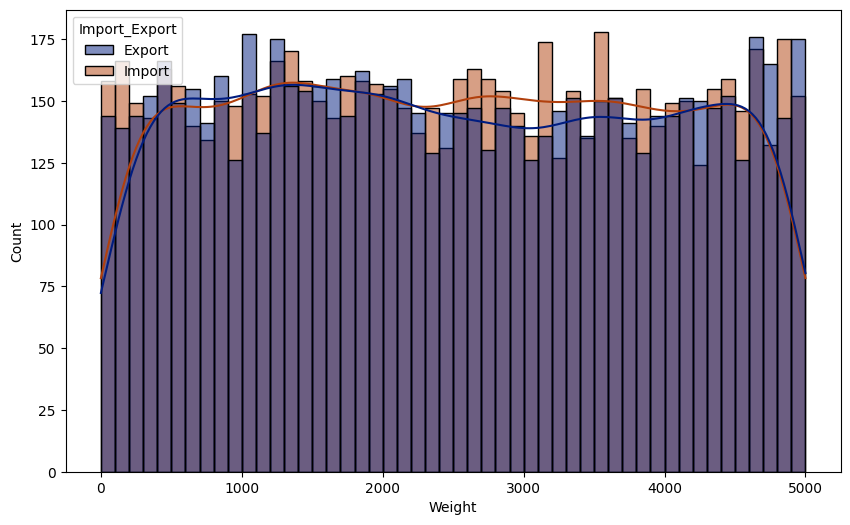

In [32]:
for col in df_num:
    plt.figure(figsize=(10,6))
    sns.histplot(x = col,data =df,hue='Import_Export',bins = 50,kde = True, palette = 'dark')
    plt.show()

Text(0, 0.5, '')

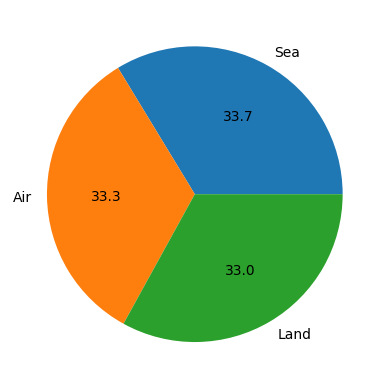

In [67]:
df.Shipping_Method.value_counts().plot(kind = 'pie', autopct = '%.1f')
plt.ylabel(None)

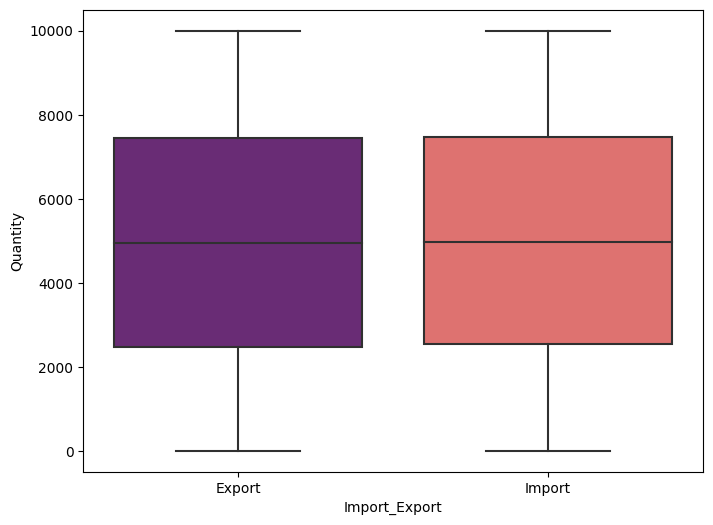

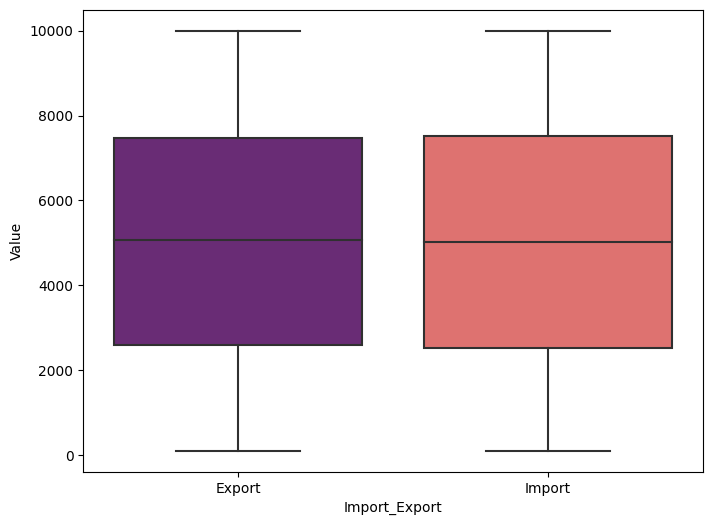

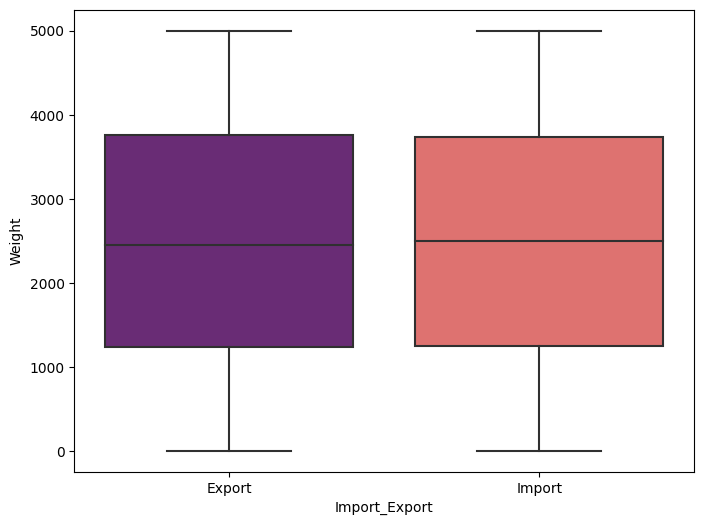

In [35]:
for col in df_num:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = 'Import_Export',data =df, y = col, palette = 'magma')
    plt.show()

Avg Weight  -> 2500

Avg Value -> 5000

Avg Quantity -> 5000

<Axes: >

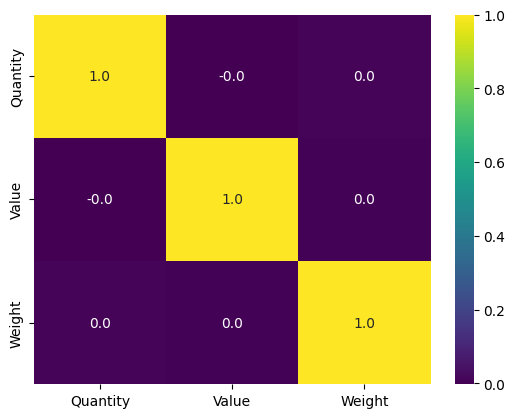

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot = True,cmap = 'viridis',fmt = '.1f')

No Correlation

In [37]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [38]:
df.head()

,Country,Product,Import_Export,Shipping_Method,Port,Category,Quantity,Value,Date,Weight,Year,Month
0,Colombia,describe,Export,Air,Robertbury,Machinery,1979,9506.57,2023-12-07,4248.65,2023,12
1,Chile,president,Export,Air,Shahport,Clothing,5763,7100.91,2023-04-04,4340.81,2023,4
2,Christmas Island,agency,Export,Air,Adamfort,Furniture,2592,7226.42,2022-05-09,4886.14,2022,5
3,Finland,policy,Export,Air,Juliebury,Electronics,2622,2817.29,2023-04-03,4406.74,2023,4
4,New Zealand,positive,Export,Sea,East Randall,Machinery,6975,657.80,2021-07-23,1497.16,2021,7


In [39]:
df['Year'].value_counts()

Year
2020    3045
2023    3028
2022    3025
2021    3023
2024    1946
2019     933
Name: count, dtype: int64

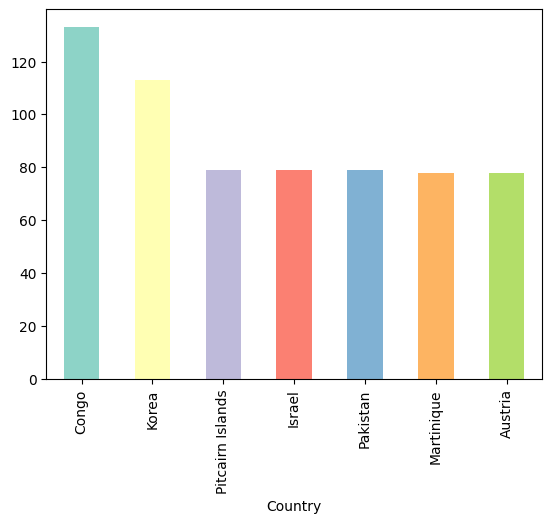

In [71]:
df.Country.value_counts().head(7).plot(kind = 'bar', color = sns.color_palette('Set3'))
plt.show()

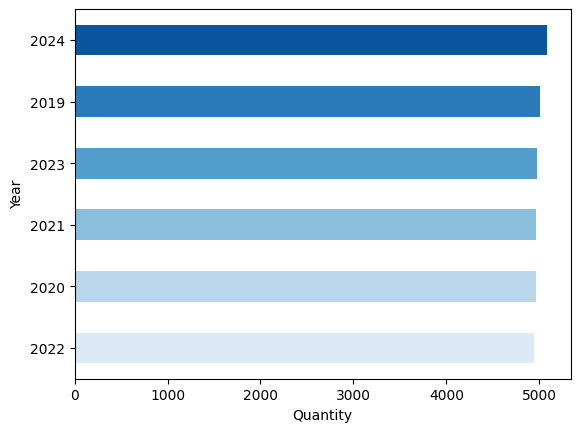

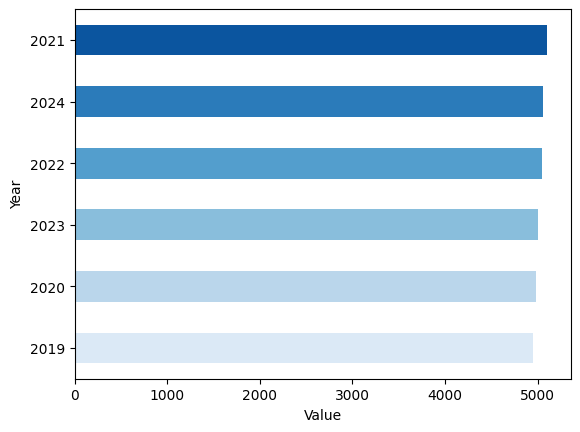

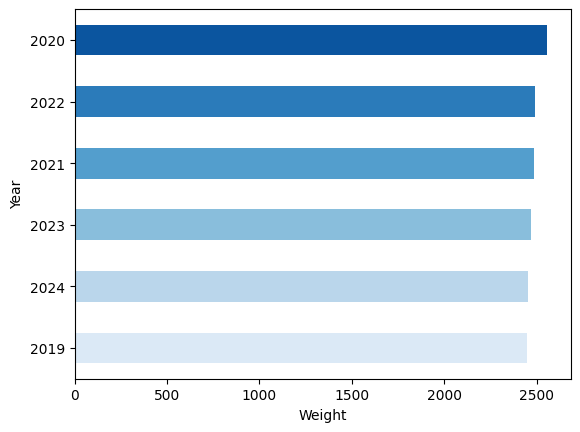

In [64]:
for col in df_num:
    df.groupby('Year')[col].mean().sort_values().plot(kind = 'barh', color = sns.color_palette("Blues"))
    plt.xlabel(col)
    plt.show()

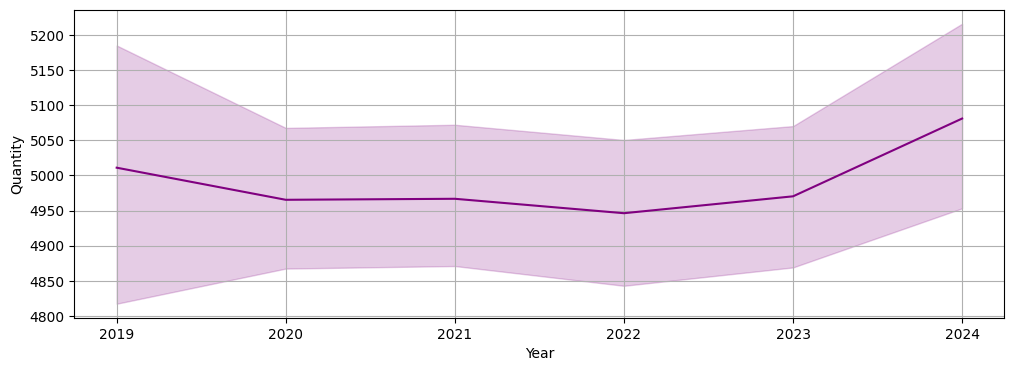

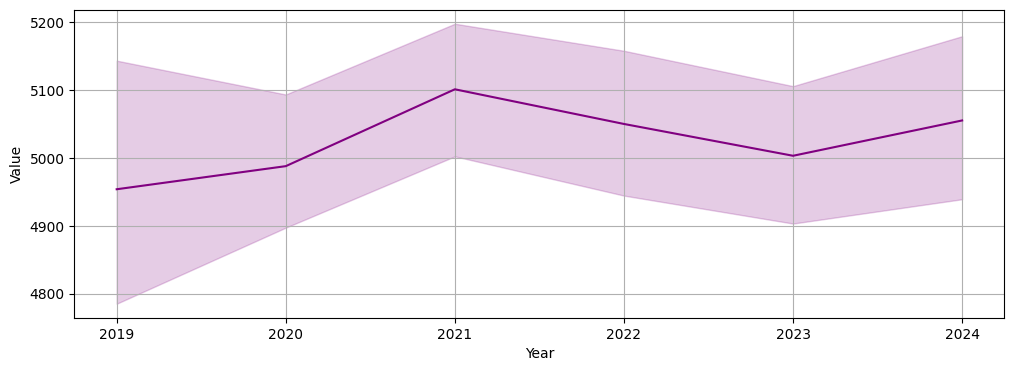

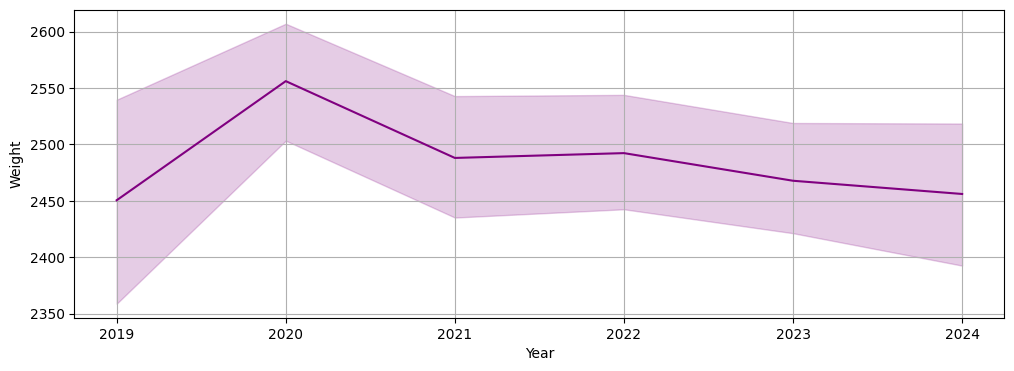

In [60]:
for col in df_num:
    plt.figure(figsize=(12,4))
    sns.lineplot(x = 'Year', y = col, data = df, estimator='mean', color = 'purple')
    plt.grid(True)
    plt.show()

2020 -> highest Weight

2021 -> Highest Value

2024 -> Highest Quantity